# Inputs for the Farmer Module: Sarati sub basin

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from PIL import Image

In [2]:
output_folder = "E:\\output_CWatM_priv_personal\\"
photo_folder = 'C:\\Users\\smilovic\\OneDrive\\CWatM\\'

The Sarati basin is a sub basin of the Upper Bhima basin. The Sarati basin is being used as a smaller scale example to use for developing and testing the model.

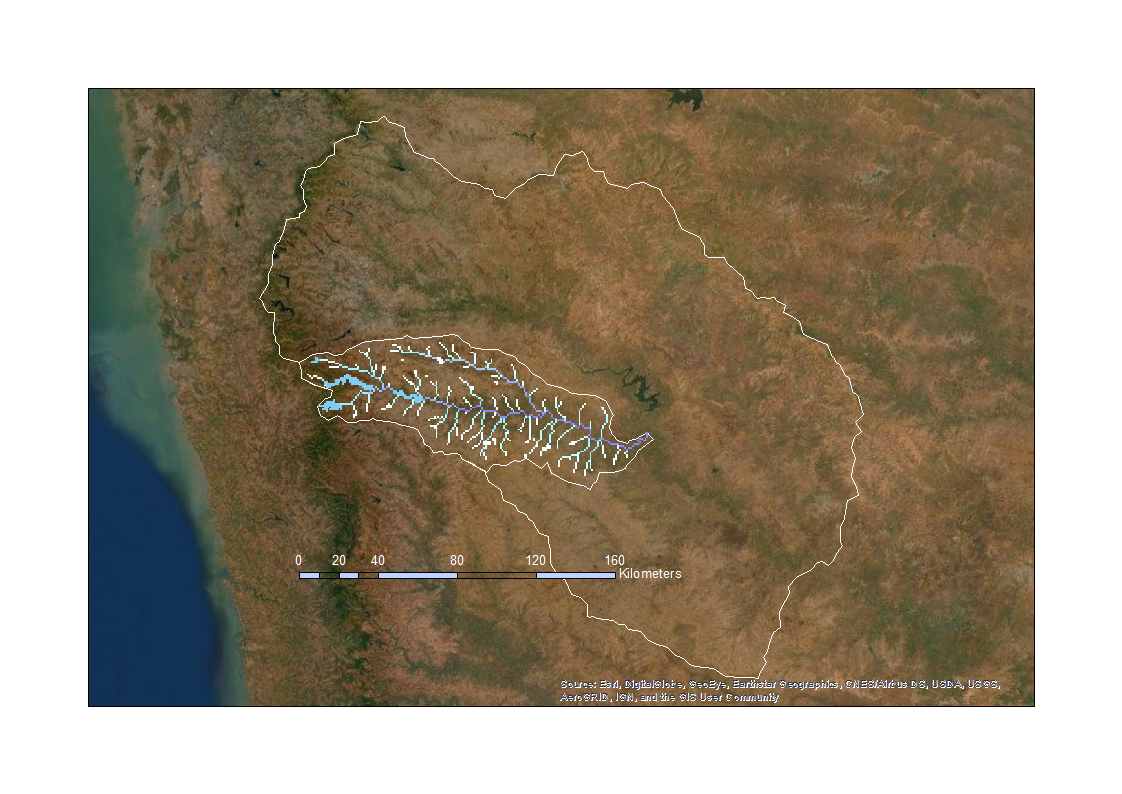

In [3]:
img = Image.open(photo_folder + 'Sarati_in_UB.tif')
img

We are currently interested in reference evapotranspiration and rainfall, averaged over the month and over each administrative unit.

The administrative units intersecting the Sarati basin are illustrated below.

## Segments: Talukas within the Sarati subbasin

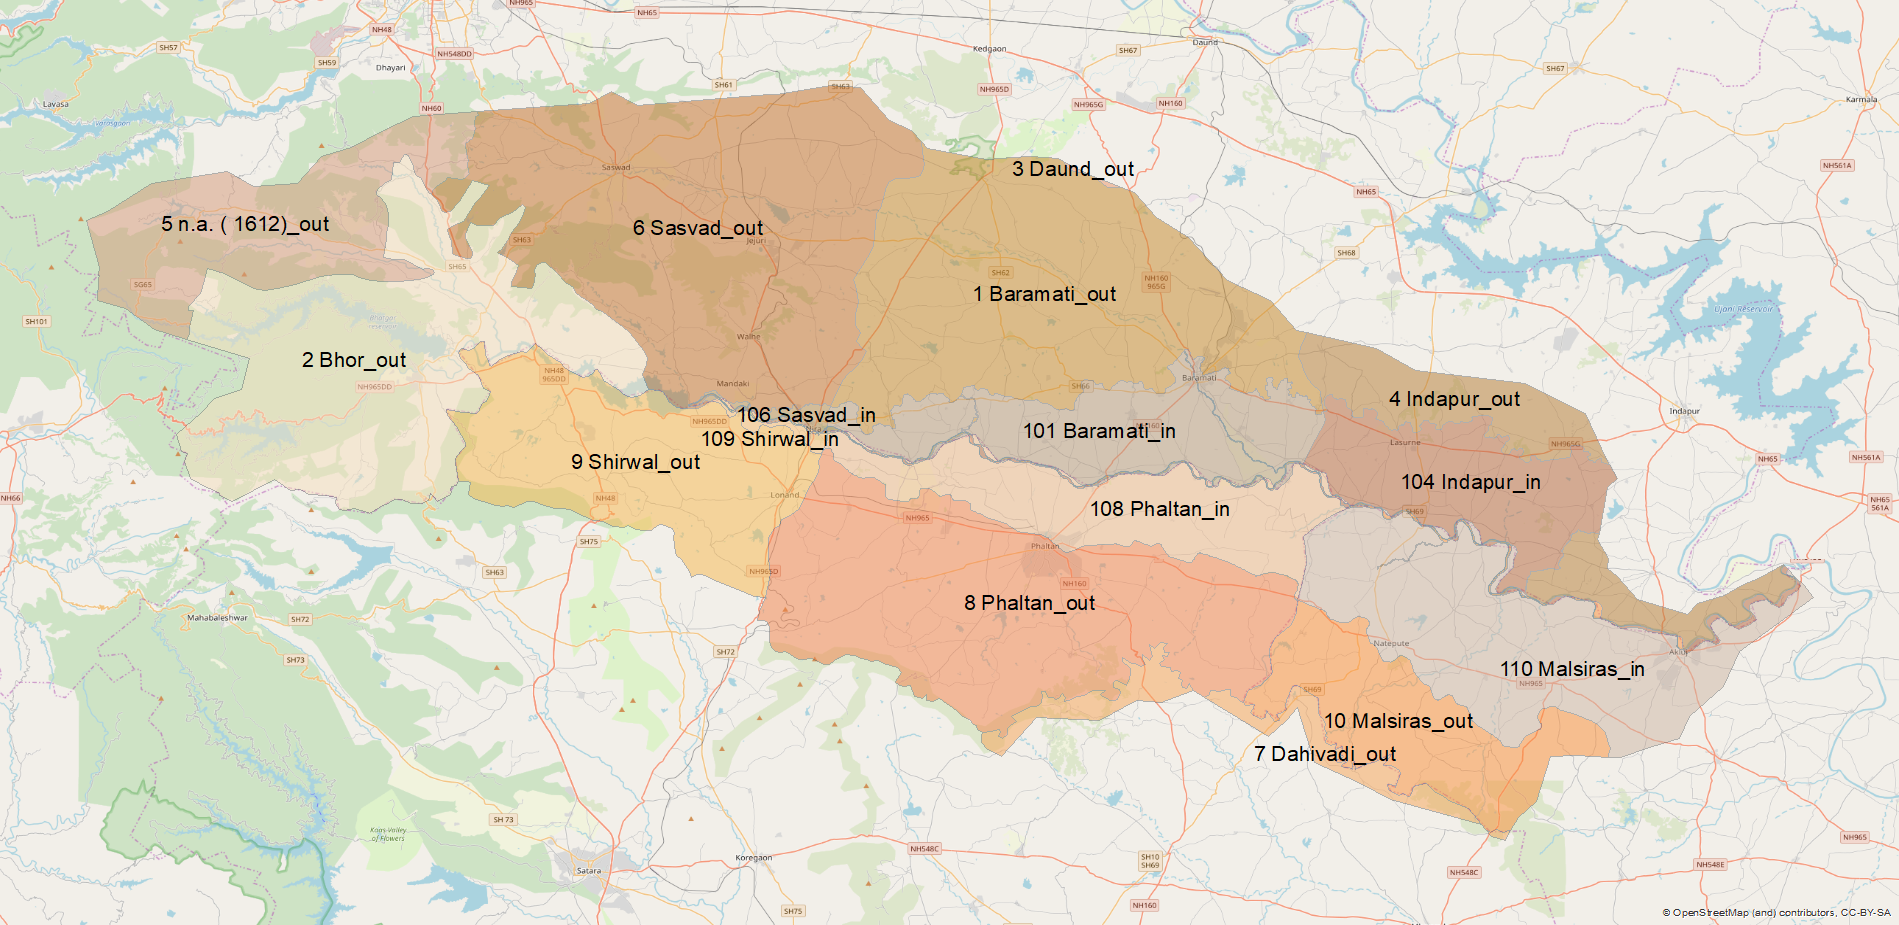

In [4]:


img = Image.open('C:\\FUSE\\Images\\admin_segements_Sarati.tif')    # Open image as PIL image object
img


In [5]:
admin_segments_file = output_folder + "adminSegments_daily.nc"

nc_admin_segments = Dataset(admin_segments_file, 'r')

admin_segments = nc_admin_segments.variables['adminSegments'][0,:,:]


The data above holds the monthly average value (ETRef, Rain, etc.) for each administrative unit in each cell of the administrative unit. 

The following code chooses a representative cell for each administrative unit.

In [6]:
Segment_reps = []

for i in range(nc_admin_segments.variables['lat'].shape[0]):
    for j in range (nc_admin_segments.variables['lon'].shape[0]):
        
        if admin_segments[i,j]>0 and admin_segments[i,j] not in [i[0] for i in Segment_reps]:       
            Segment_reps.append([int(admin_segments[i,j]), i, j])

Segment_reps.sort()

for i in Segment_reps:
    print('Segment ' +str(i[0])+ ', lat ' +str(i[1])+ ', lon ' +str(i[2]))

Segment 1, lat 137, lon 138
Segment 2, lat 138, lon 78
Segment 3, lat 138, lon 154
Segment 4, lat 157, lon 181
Segment 5, lat 132, lon 87
Segment 6, lat 129, lon 127
Segment 7, lat 192, lon 163
Segment 8, lat 169, lon 143
Segment 9, lat 158, lon 88
Segment 10, lat 177, lon 189
Segment 101, lat 159, lon 167
Segment 104, lat 164, lon 183
Segment 106, lat 164, lon 113
Segment 108, lat 168, lon 127
Segment 109, lat 165, lon 115
Segment 110, lat 177, lon 184


## Reference Evapotranspiration and Rainfall
Amounts are given in metres [m]

In [7]:
ETRef_monAvg_segments_file = output_folder + "ETRef_segments_monthavg.nc"
rain_monAvg_segments_file = output_folder + "rain_segments_monthavg.nc"

nc_ETRef_monAvg_segments = Dataset(ETRef_monAvg_segments_file, 'r')
nc_rain_monAvg_segments = Dataset(rain_monAvg_segments_file, 'r')

ETRef_monAvg_segments = nc_ETRef_monAvg_segments.variables['ETRef_segments_monthavg'][:,:,:]
rain_monAvg_segments = nc_rain_monAvg_segments.variables['rain_segments_monthavg'][:,:,:]


In [8]:
ETRef_monAvg_representative = []
rain_monAvg_representative= []

for seg in Segment_reps:
    
    ETRef_monAvg_representative.append([seg[0]])
    rain_monAvg_representative.append([seg[0]])
    
    for t in range(nc_ETRef_monAvg_segments.variables['time'].shape[0]):
        ETRef_monAvg_representative[-1].append(ETRef_monAvg_segments[t, seg[1], seg[2]])
        rain_monAvg_representative[-1].append(rain_monAvg_segments[t, seg[1], seg[2]])

### Evapotranspiration

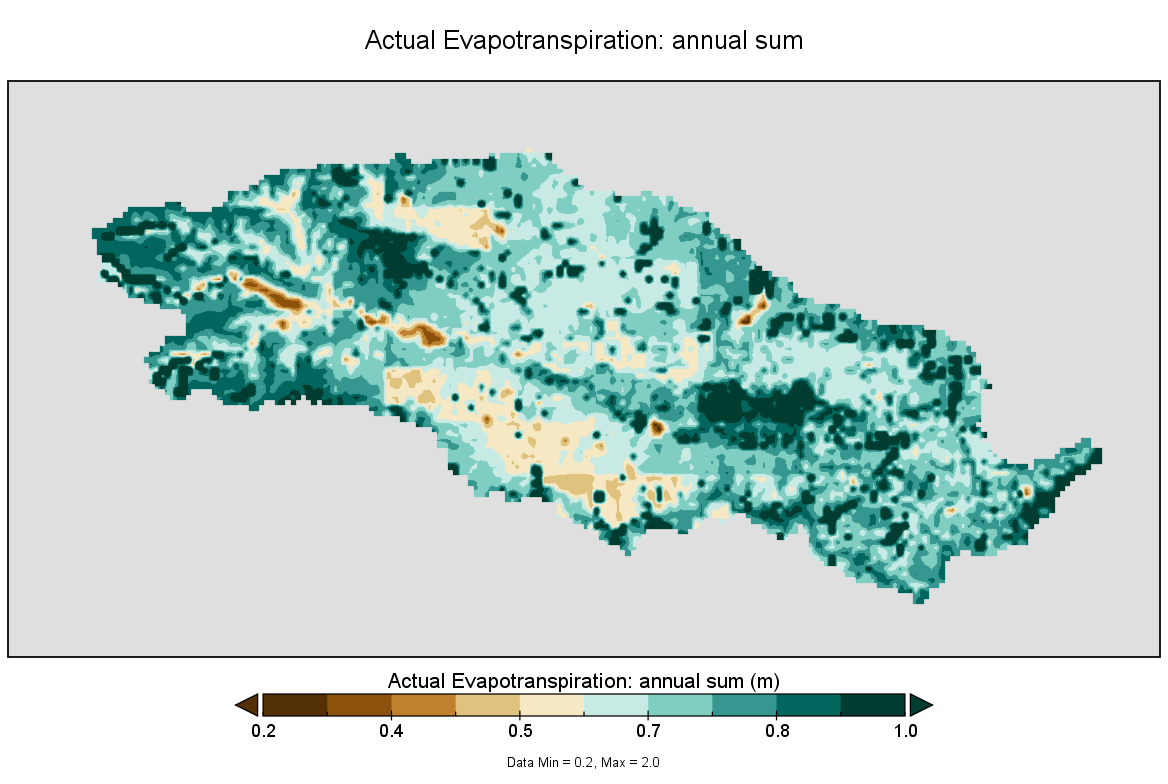

In [9]:
img = Image.open(photo_folder + 'sum_actualET_annualtot.png')    # Open image as PIL image object
img

In [10]:
fig = go.Figure()

for i in ETRef_monAvg_representative:
    fig.add_trace(go.Scatter(y=i[1:],
                    mode='lines',
                    name=i[0]))


fig.update_layout(title='Reference Evapotranspiration',
                       xaxis_title='Month',
                       yaxis_title='Monthly Average Reference ET (m/day)')

fig.show()

The following output may allow for easier input into Excel.

In [11]:
for seg in ETRef_monAvg_representative:
    print(*seg, sep = ", ")

1, 0.0033995924, 0.0046014087, 0.005453434, 0.0064964965, 0.006609578, 0.0049505373, 0.0030336913, 0.0027575712, 0.0037325108, 0.003953712, 0.0035061808, 0.003391401, 0.0037274787, 0.0048003956, 0.0059772492, 0.0067162067, 0.0072097136, 0.0046089706, 0.0028184422, 0.0023972646, 0.0036267084, 0.003988913, 0.0037771808, 0.0037209396
2, 0.0031372162, 0.0039751516, 0.0050005033, 0.0058646826, 0.0056316005, 0.0042696553, 0.0019191642, 0.0016440605, 0.0029180914, 0.0035557968, 0.003118965, 0.0028488324, 0.00314613, 0.004145049, 0.0051940065, 0.0057120817, 0.0058379862, 0.003377193, 0.0017192656, 0.001343217, 0.0027681713, 0.0034489061, 0.0032451288, 0.003027409
3, 0.0032743148, 0.004281549, 0.0051864698, 0.0061943643, 0.006307034, 0.0045219497, 0.0027750859, 0.0024560932, 0.003572804, 0.0038677095, 0.0033303797, 0.0031269528, 0.003451542, 0.0044516386, 0.0056071524, 0.006302425, 0.00673061, 0.0042934776, 0.0025676691, 0.0021399832, 0.0034721124, 0.003864336, 0.003569429, 0.003436283
4, 0.003

### Rainfall

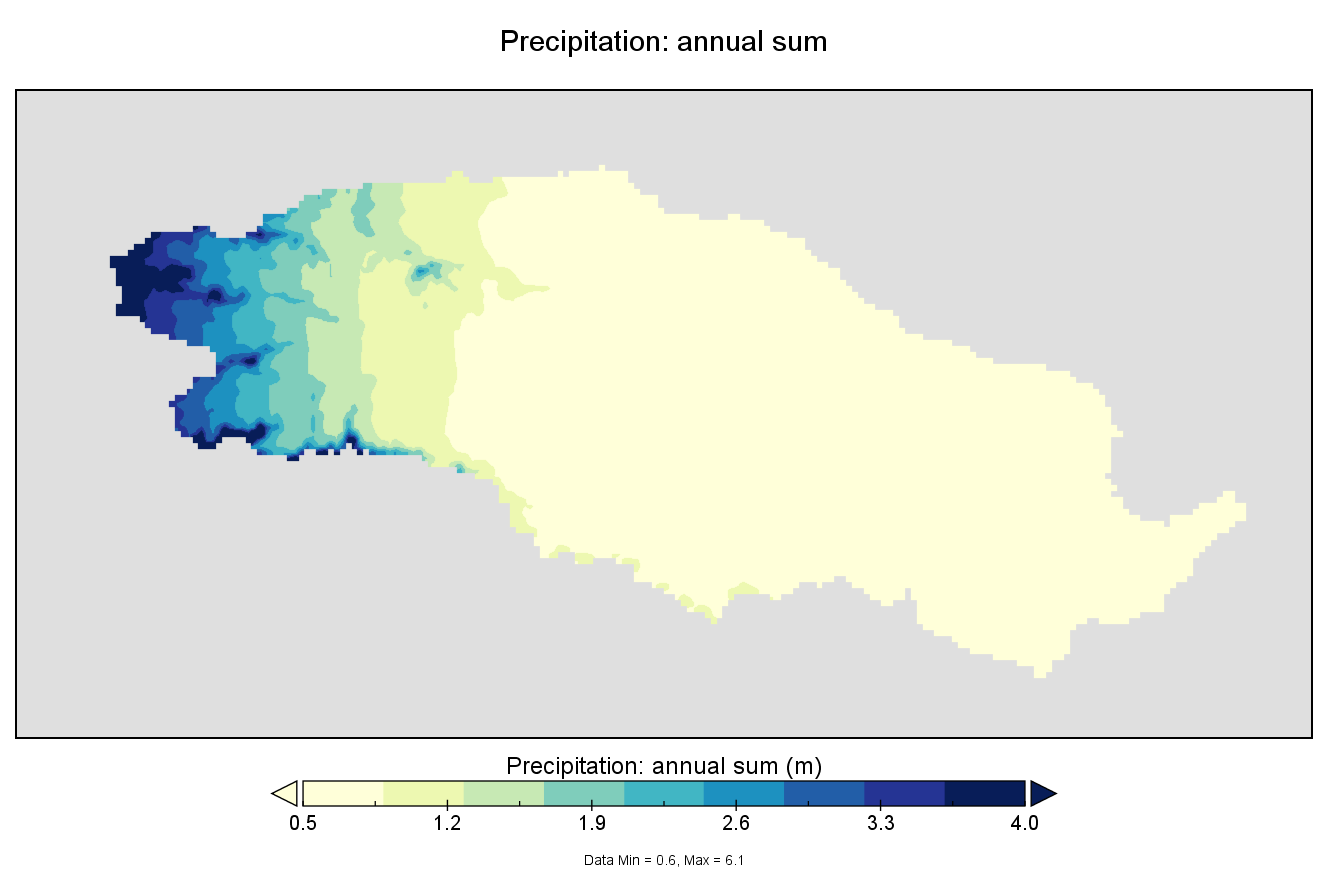

In [12]:
img = Image.open(photo_folder + 'sum_precipitation_annualtot.png')    # Open image as PIL image object
img


In [13]:
fig = go.Figure()
    
for i in rain_monAvg_representative:
    fig.add_trace(go.Scatter(y=i[1:],
                    mode='lines',
                    name=i[0]))


fig.update_layout(title='Rainfall',
                       xaxis_title='Month',
                       yaxis_title='Monthly Average Rainfall (m/day)')

fig.show()

The following output may allow for easier input into Excel.

In [14]:
for seg in rain_monAvg_representative:
    print(*seg, sep = ", ")

1, 0.00075593364, 0.0, 1.0376839e-05, 0.00023667533, 0.0012983439, 0.0006805525, 0.0021028046, 0.00075486064, 0.005575108, 0.004349528, 0.00016461033, 0.0, 6.901707e-05, 1.3458923e-08, 4.659234e-07, 2.8032406e-05, 5.4062384e-05, 0.0037837445, 0.0035869426, 0.000631736, 0.004260019, 0.006355865, 0.00031999705, 0.0
2, 0.00088149466, 0.0, 1.7107025e-06, 0.0005667317, 0.001198428, 0.00033903867, 0.016719935, 0.0026694625, 0.008823999, 0.0059695835, 0.0002764805, 0.0, 5.6984714e-05, 0.0, 3.16699e-07, 3.3323515e-05, 0.00022980759, 0.008928452, 0.020864092, 0.004489305, 0.004818917, 0.0098151, 0.00039771487, 0.0
3, 0.00091969577, 0.0, 9.719558e-06, 0.00022766391, 0.0013093662, 0.0009030045, 0.0020655503, 0.0008854248, 0.0056702984, 0.004074955, 0.00017075287, 0.0, 0.00010896164, 3.1556618e-07, 7.278617e-07, 2.9549463e-05, 3.435154e-05, 0.0038011333, 0.003680565, 0.0008546013, 0.0044390764, 0.0059440257, 0.00030026736, 0.0
4, 0.0009358106, 0.0, 5.8225316e-05, 0.00024642545, 0.0016699118, 0.001

## Cropland use
Areas are given in metres squared [m2]

In [15]:
sugarAdsali_segments_file = output_folder + "areaCrops_Irr_segment[1]_daily.nc"
sugarPreSeasonal_segments_file = output_folder + "areaCrops_Irr_segment[2]_daily.nc"
sugarSuru_segments_file = output_folder + "areaCrops_Irr_segment[3]_daily.nc"
sorghum_segments_file = output_folder + "areaCrops_Irr_segment[4]_daily.nc"

nc_sugarAdsali_segments = Dataset(sugarAdsali_segments_file, 'r')
nc_sugarPreSeasonal_segments = Dataset(sugarPreSeasonal_segments_file, 'r')
nc_sugarSuru_segments = Dataset(sugarSuru_segments_file, 'r')
nc_sorghum_segments = Dataset(sorghum_segments_file, 'r')

sugarAdsali_segments = nc_sugarAdsali_segments.variables['areaCrops_Irr_segment[1]'][0,:,:]
sugarPreSeasonal_segments = nc_sugarPreSeasonal_segments.variables['areaCrops_Irr_segment[2]'][0,:,:]
sugarSuru_segments = nc_sugarSuru_segments.variables['areaCrops_Irr_segment[3]'][0,:,:]
sorghum_segments = nc_sorghum_segments.variables['areaCrops_Irr_segment[4]'][0,:,:]

In [16]:
sugarAdsali_representative = []
sugarPreSeasonal_representative = []
sugarSuru_representative = []
sorghum_representative = []

for seg in Segment_reps:
    
    sugarAdsali_representative.append([seg[0], sugarAdsali_segments[seg[1], seg[2]]])
    sugarPreSeasonal_representative.append([seg[0], sugarPreSeasonal_segments[seg[1], seg[2]]])
    sugarSuru_representative.append([seg[0], sugarSuru_segments[seg[1], seg[2]]])
    sorghum_representative.append([seg[0], sorghum_segments[seg[1], seg[2]]])

### Sugarcane, Adsali variety

The following output may allow for easier input into Excel.

In [17]:
for i in range(len(Segment_reps)):
    print(str(sugarAdsali_representative[i][0]) + ', '+ str(sugarAdsali_representative[i][1]) + ', ' + str(sugarPreSeasonal_representative[i][1]) + ', ' + str(sugarSuru_representative[i][1]) + ', ' + str(sorghum_representative[i][1]))

1, 7398326.0, 20507428.0, 7810933.0, 37306910.0
2, 8928162.0, 24547600.0, 7891208.5, 11802677.0
3, 7211.4707, 8749.339, 3127.634, 6430.7476
4, 3856967.0, 11075507.0, 5159695.5, 60302720.0
5, 4290064.5, 11809850.0, 3894564.0, 7244894.5
6, 12850549.0, 36198190.0, 13165909.0, 37408524.0
7, 997894.5, 2743766.8, 983401.44, 152010.5
8, 8591854.0, 23987994.0, 8931055.0, 25231600.0
9, 5200022.0, 14351692.0, 4688807.5, 5700084.5
10, 3656096.8, 10089222.0, 4176961.5, 19532572.0
101, 8577042.0, 25597036.0, 14022638.0, 176275730.0
104, 6164584.0, 18364044.0, 10719324.0, 161501580.0
106, 292202.0, 864091.5, 310614.88, 2359655.0
108, 9067185.0, 27111428.0, 14915146.0, 122440344.0
109, 310060.25, 913120.75, 366570.9, 809670.8
110, 17674034.0, 52390990.0, 31581992.0, 286415500.0


### Visualisation 

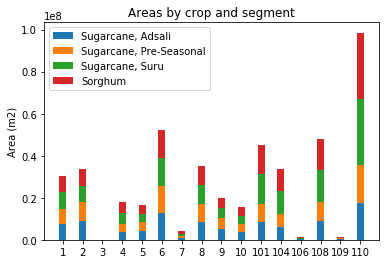

In [18]:
N = 16
sugarAdsali = np.array([i[1] for i in sugarAdsali_representative])
sugarPreSeasonal = np.array([i[1] for i in sugarAdsali_representative])
sugarSuru = np.array([i[1] for i in sugarSuru_representative])
sorghum = [i[1] for i in sorghum_representative]

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, sugarAdsali, width)
p2 = plt.bar(ind, sugarPreSeasonal, width,
             bottom=sugarAdsali)
p3 = plt.bar(ind, sugarSuru, width, bottom= sugarAdsali+sugarPreSeasonal)
p4 = plt.bar(ind, sugarSuru, width, bottom= sugarAdsali+sugarPreSeasonal+sugarSuru)

plt.ylabel('Area (m2)')
plt.title('Areas by crop and segment')
plt.xticks(ind, [i[0] for i in sugarAdsali_representative])
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Sugarcane, Adsali', 'Sugarcane, Pre-Seasonal', 'Sugarcane, Suru', 'Sorghum'))
#plt.legend((p1[0], p2[0]), ('Sugarcane, Adsali', 'Sugarcane, Pre-Seasonal'))

plt.show()

In [19]:
sugarAdsali = np.array([i[1] for i in sugarAdsali_representative])
sugarPreSeasonal = np.array([i[1] for i in sugarAdsali_representative])
sugarSuru = np.array([i[1] for i in sugarSuru_representative])
sorghum = [i[1] for i in sorghum_representative]

Crop = [sugarAdsali, sugarPreSeasonal, sugarSuru, sorghum]

Crop_name = ['Sugarcane, variety Adsali', 'Sugarcane, variety Pre-Seasonal', 'Sugarcane, variety Suru', 'Sorghum']

fig = go.Figure()
x=['s'+str(i[0]) for i in sugarAdsali_representative]

for c in range(len(Crop)):
        fig.add_trace(go.Bar(x = x, 
                             y = Crop[c],
                             name = Crop_name[c]))

fig.update_layout(title='Crop areas',
                  xaxis_title='Segment',
                  yaxis_title='Area (m2)', 
                  barmode='stack')

fig.show()

## Crop-specific Water use 

In [20]:
PETTotVol_sugarAdsali_segments_file = output_folder + "PET_Sugar1_segments_monthtot.nc"
PETTotVol_sugarPreSeasonal_segments_file = output_folder + "PET_Sugar2_segments_monthtot.nc"
PETTotVol_sugarSuru_segments_file = output_folder + "PET_Sugar3_segments_monthtot.nc"
PETTotVol_sorghum_segments_file = output_folder + "PET_Sorghum_segments_monthtot.nc"

nc_PETTotVol_sugarAdsali_segments = Dataset(PETTotVol_sugarAdsali_segments_file, 'r')
nc_PETTotVol_sugarPreSeasonal_segments = Dataset(PETTotVol_sugarPreSeasonal_segments_file, 'r')
nc_PETTotVol_sugarSuru_segments = Dataset(PETTotVol_sugarSuru_segments_file, 'r')
nc_PETTotVol_sorghum_segments = Dataset(PETTotVol_sorghum_segments_file, 'r')

PETTotVol_sugarAdsali_segments = nc_PETTotVol_sugarAdsali_segments.variables['PET_Sugar1_segments_monthtot'][:,:,:]
PETTotVol_sugarPreSeasonal_segments = nc_PETTotVol_sugarPreSeasonal_segments.variables['PET_Sugar2_segments_monthtot'][:,:,:]
PETTotVol_sugarSuru_segments = nc_PETTotVol_sugarSuru_segments.variables['PET_Sugar3_segments_monthtot'][:,:,:]
PETTotVol_sorghum_segments = nc_PETTotVol_sorghum_segments.variables['PET_Sorghum_segments_monthtot'][:,:,:]

PETTotVol_sugarAdsali_representative = []
PETTotVol_sugarPreSeasonal_representative = []
PETTotVol_sugarSuru_representative = []
PETTotVol_sorghum_representative = []

for seg in Segment_reps:
    
    PETTotVol_sugarAdsali_representative.append([seg[0]])
    PETTotVol_sugarPreSeasonal_representative.append([seg[0]])
    PETTotVol_sugarSuru_representative.append([seg[0]])
    PETTotVol_sorghum_representative.append([seg[0]])
    
    for t in range(nc_ETRef_monAvg_segments.variables['time'].shape[0]):
        
        PETTotVol_sugarAdsali_representative[-1].append(PETTotVol_sugarAdsali_segments[t, seg[1], seg[2]])
        PETTotVol_sugarPreSeasonal_representative[-1].append(PETTotVol_sugarPreSeasonal_segments[t, seg[1], seg[2]])
        PETTotVol_sugarSuru_representative[-1].append(PETTotVol_sugarSuru_segments[t, seg[1], seg[2]])
        PETTotVol_sorghum_representative[-1].append(PETTotVol_sorghum_segments[t, seg[1], seg[2]])
    


In [21]:
Crop_name = ['Sugarcane, variety Adsali', 'Sugarcane, variety Pre-Seasonal', 'Sugarcane, variety Suru', 'Sorghum']

Crop = [PETTotVol_sugarAdsali_representative, PETTotVol_sugarPreSeasonal_representative, 
        PETTotVol_sugarSuru_representative, PETTotVol_sorghum_representative]

for c in range(len(Crop)):
    fig = go.Figure()
    """
    for i in PETTotVol_sugarAdsali_representative:
        fig.add_trace(go.Scatter(y=i[1:],
                        mode='lines',
                        name=i[0]))
    """
    for i in Crop[c]:
        fig.add_trace(go.Scatter(y=i[1:],
                        mode='lines',
                        name=i[0]))

    fig.update_layout(title='Monthly Total Potential ET: '+ Crop_name[c],
                       xaxis_title='Month',
                       yaxis_title='Potential ET (m3/month)')

    fig.show()

The following outputs may allow for easier input into Excel.

In [22]:
for c in range(len(Crop)):
    print(Crop_name[c])
    for seg in Crop[c]:
        print(*seg, sep = ", ")
    print('\n')

Sugarcane, variety Adsali
1, 0.0, 0.0, 0.0, 0.0, 0.0, 265253.97, 167928.17, 308395.53, 393485.72, 426788.25, 578927.4, 584952.94, 641580.25, 772324.3, 1024933.2, 1114577.6, 1238105.8, 766409.9, 488301.0, 251192.84, 358581.47, 405092.97, 0.0, 0.0
2, 0.0, 0.0, 0.0, 0.0, 0.0, 427743.53, 197419.9, 340249.3, 585977.8, 738530.56, 982063.75, 930322.5, 1029151.2, 1266165.6, 1689485.0, 1792952.0, 1892240.1, 1057595.9, 551784.4, 260364.39, 520896.56, 671727.1, 0.0, 0.0
3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
4, 0.0, 0.0, 0.0, 0.0, 0.0, 245147.94, 155955.03, 322884.0, 324132.38, 334988.8, 494893.97, 535005.4, 584047.25, 683139.2, 899770.5, 976797.1, 1099923.5, 684177.06, 460291.6, 252174.16, 306918.03, 327586.9, 0.0, 0.0
5, 0.0, 0.0, 0.0, 0.0, 0.0, 210911.33, 95507.07, 164161.11, 288230.12, 363909.16, 482916.16, 455572.38, 506640.0, 623405.7, 831414.7, 880838.8, 926201.56, 516660.38, 267181.1, 125367.84, 256295.73, 